## Chinese Postman

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import itertools

## Graph

In [ ]:
G = nx.Graph()

edges = [
    ('A', 'B', 2),
    ('B', 'C', 2),
    ('C', 'D', 5),
    ('D', 'A', 2),
    ('A', 'C', 3),
    ('B', 'D', 4)
]

for u, v, w in edges:
    G.add_edge(u, v, weight=w)

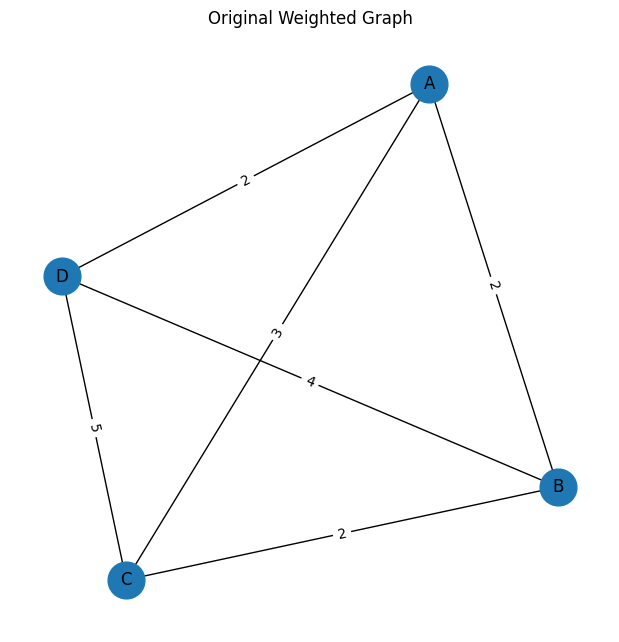

In [ ]:
pos = nx.spring_layout(G, seed=42)

plt.figure(figsize=(6,6))
nx.draw(G, pos, with_labels=True, node_size=700)
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.title("Original Weighted Graph")
plt.show()

## Identifying odd nodes

In [ ]:
odd_nodes = [v for v in G.nodes() if G.degree(v) % 2 == 1]
odd_nodes

['A', 'B', 'C', 'D']

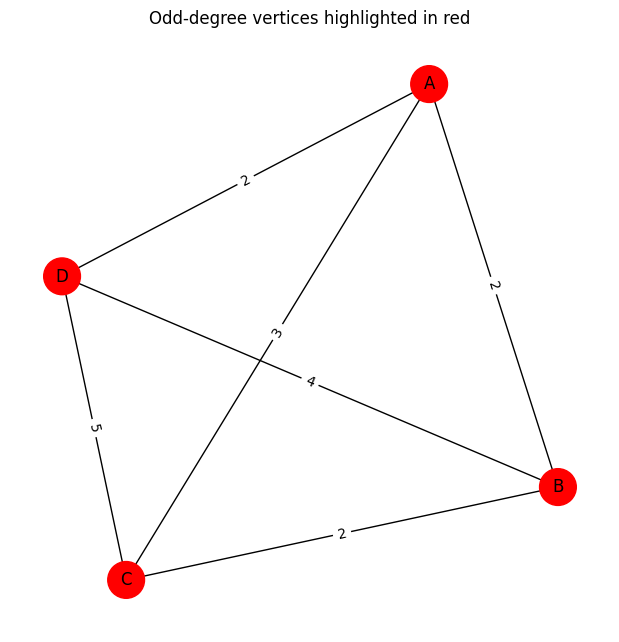

In [ ]:
node_colors = ['red' if v in odd_nodes else 'lightblue' for v in G.nodes()]

plt.figure(figsize=(6,6))
nx.draw(G, pos, with_labels=True, node_color=node_colors, node_size=700)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.title("Odd-degree vertices highlighted in red")
plt.show()

## Shortest paths and Minimum Weight Matching

In [ ]:
distances = dict(nx.all_pairs_dijkstra_path_length(G, weight='weight'))

In [ ]:
pairs = list(itertools.combinations(odd_nodes, 2))

pair_weights = {}
for u, v in pairs:
    pair_weights[(u, v)] = distances[u][v]

def min_weight_matching(nodes, weights):
    if not nodes:
        return 0, []
    u = nodes[0]
    best = (float('inf'), [])
    for v in nodes[1:]:
        remaining = nodes[1:]
        remaining.remove(v)
        cost, matching = min_weight_matching(remaining, weights)
        total = cost + weights[(u, v)]
        if total < best[0]:
            best = (total, [(u, v)] + matching)
    return best

cost, matching = min_weight_matching(odd_nodes, pair_weights)
matching

[('A', 'D'), ('B', 'C')]

## Graph Augmentation

In [ ]:
G_aug = nx.MultiGraph(G)

for u, v in matching:
    path = nx.shortest_path(G, u, v, weight='weight')
    for i in range(len(path) - 1):
        G_aug.add_edge(
            path[i],
            path[i+1],
            weight=G[path[i]][path[i+1]]['weight']
        )

In [ ]:
nx.is_eulerian(G_aug)

True

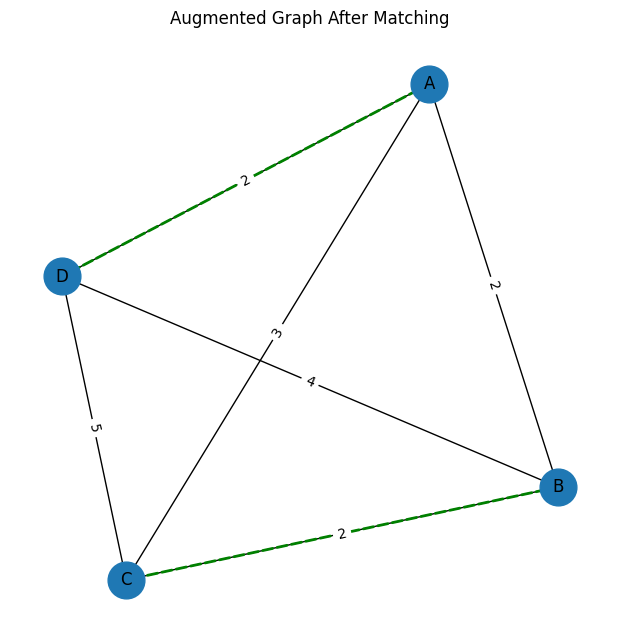

In [ ]:
plt.figure(figsize=(6,6))

nx.draw(G, pos, with_labels=True, node_size=700)

added_edges = []
for u, v in matching:
    path = nx.shortest_path(G, u, v, weight='weight')
    for i in range(len(path) - 1):
        added_edges.append((path[i], path[i+1]))

nx.draw_networkx_edges(
    G_aug, pos,
    edgelist=added_edges,
    edge_color='green',
    style='dashed',
    width=2
)

nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.title("Augmented Graph After Matching")
plt.show()

## Eulerian Circuit


In [ ]:
euler_circuit = list(nx.eulerian_circuit(G_aug))
euler_circuit

[('A', 'D'),
 ('D', 'C'),
 ('C', 'B'),
 ('B', 'D'),
 ('D', 'A'),
 ('A', 'C'),
 ('C', 'B'),
 ('B', 'A')]

In [ ]:
euler_circuit[:5]

[('A', 'D'), ('D', 'C'), ('C', 'B'), ('B', 'D'), ('D', 'A')]

In [ ]:
total_cost = 0

for u, v in euler_circuit:
    edge_data = list(G_aug[u][v].values())[0]
    total_cost += edge_data['weight']

total_cost


22

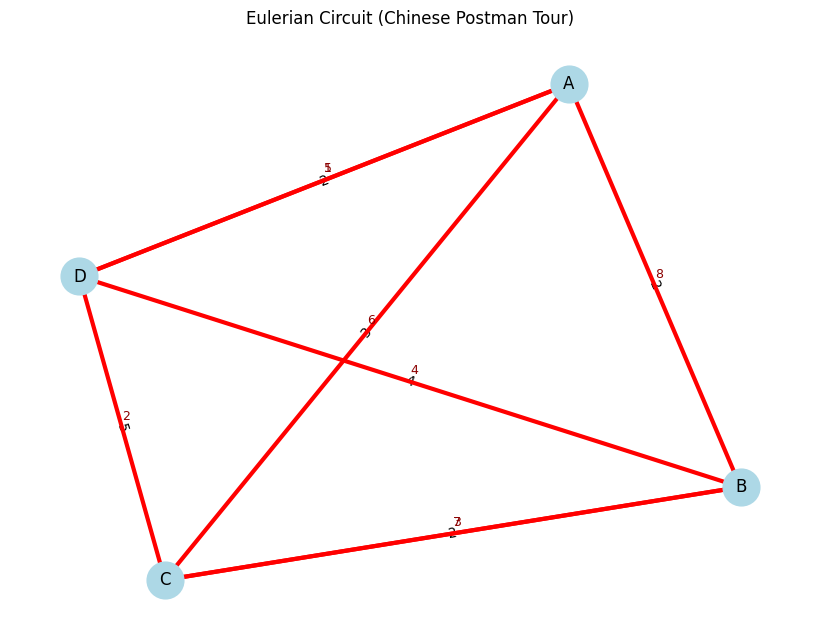

In [ ]:
plt.figure(figsize=(8,6))

nx.draw(
    G_aug,
    pos,
    with_labels=True,
    node_size=700,
    node_color="lightblue",
    edge_color="lightgray",
    width=2
)

edge_labels_aug = nx.get_edge_attributes(G_aug, 'weight')
nx.draw_networkx_edge_labels(G_aug, pos, edge_labels=edge_labels_aug)

for i, (u, v) in enumerate(euler_circuit):
    nx.draw_networkx_edges(
        G_aug, pos,
        edgelist=[(u, v)],
        edge_color="red",
        width=3
    )
    mx = (pos[u][0] + pos[v][0]) / 2
    my = (pos[u][1] + pos[v][1]) / 2
    plt.text(mx, my + 0.03, str(i+1), fontsize=9, color="darkred")

plt.title("Eulerian Circuit (Chinese Postman Tour)")
plt.axis("off")
plt.show()
